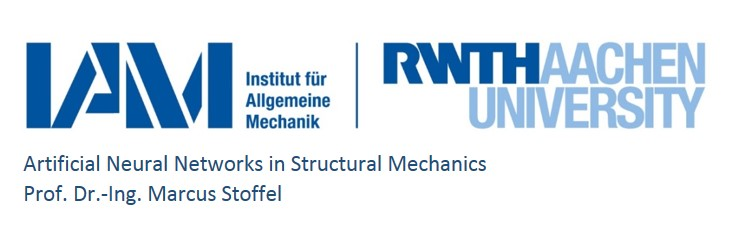

# Exercise 7 - 01.12.2022

The goal is to understand the architecture and functioning of a radial basis function
*******************************************************************************************************************************
Trivia:
---------

RBFs were the goto functions for pattern recognition but quickly got over thrown by Support vector
machines. But they have an interesting ability to predict oscillating and periodic data, hence opens up a 
great deal of possibilities in application to vibrations and so on.


Task:
--------

* Import the data from csv file using pandas.
* Split the data and assign it to numpy arrays.
* Calulate centers using sklearn and compute standard deviations.
* Define RBF as taught in the lecture.
* Define function/funtions to compute Feed Forward and Back Propagation.
* Use an online approach for Feedforward and backpropagation functions.
* Predict the data and plot the results using matplotlib.


Note - In RBF the number of hidden neurons should be always greater than Input neurons for better convergence

## Import Necessary Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import copy

## Define Radial Basis Function

### Gaussian Function 

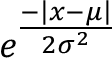

In [22]:
def radbasis(x,c,s):
    # Assuming x and c are vectors
    # Length of vectors -> # Inputs
    # s: standard deviation
    norm = 0
    for kk in range(0,len(x)):
        norm = norm + (x[kk] - c[kk])**2
    #norm = np.sqrt(norm)
    return np.exp(-norm/(2*(s**2)))

In [23]:
np.exp(2)

7.38905609893065

## Define Modular Radial Basis Function

 * Begin with defining Radial basis function. Modular RBF will be explained in the exercise

In [24]:
def modradbasis(x,c,s):
    a1=0.6
    a2=0.6
    return a1*np.exp(-((x[0]-c[0])**2)/(2*s**2))+a2*np.exp(-((x[1]-c[1])**2)/(2*s**2))

Graphical representation of Radial Basis and modular Radial basis Activation functions
------------------------------------------------------------------------------------------------------------------------------

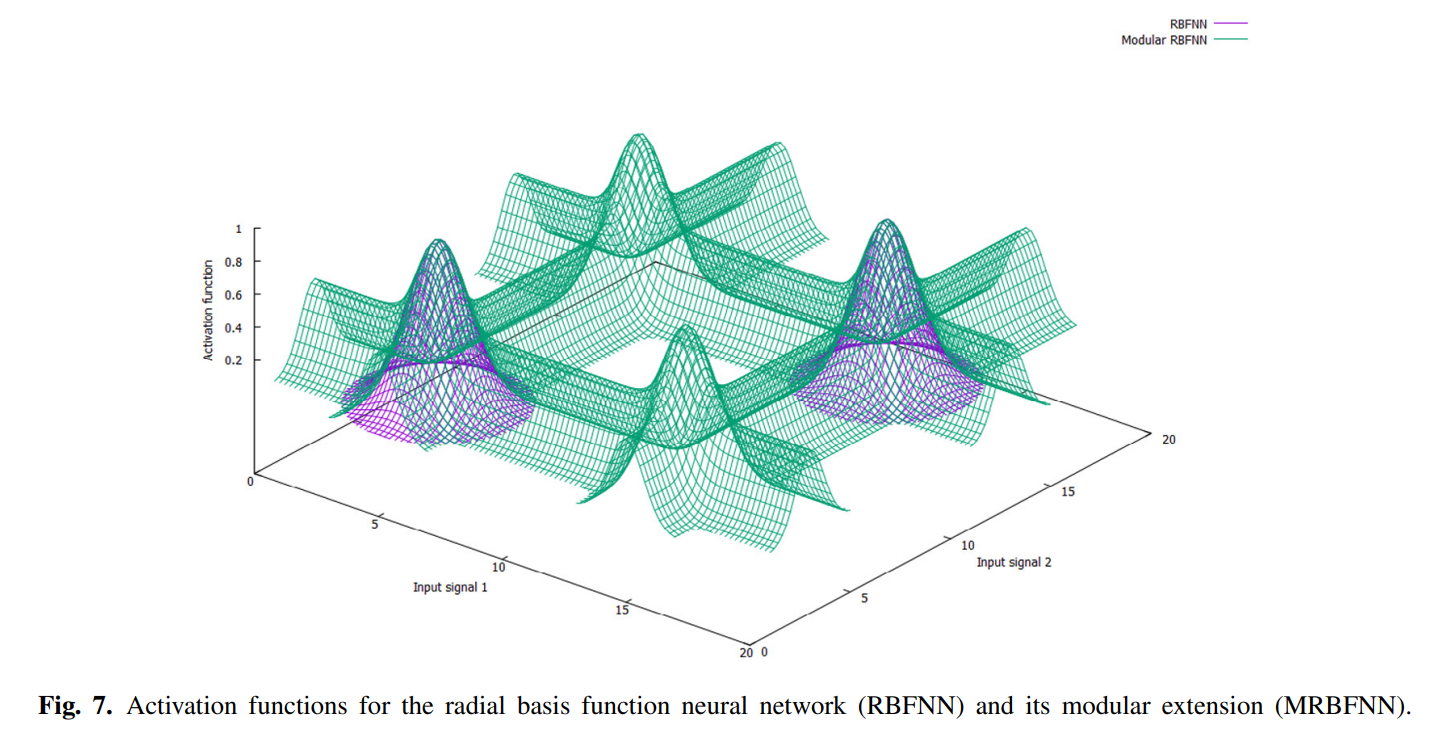

## Define Hyper parameters

Define the seed value for the random value generators so that one can generate same random values 
every time the code is run.

Without a random seed, since the values are generated randomly everytime you run the code, you get
different set of random values each time. We work around this problem with a random seed.

To make sure everyone has same random values, you are suggested to set the random seed to '24'

Also use an empty dictionary nn to store all the values we compute in the code 

In [25]:
net_shape=[2,8,1]
numIn = net_shape[0]
numHidden = net_shape[1]
numOut = net_shape[-1]
nn = {}
np.random.seed(24)

## Read Inputs

Import the csv file "ipdata.csv" and split the data to Input and Output variables using pandas library.

In [26]:
data = pd.read_csv('ipdataRBF.csv',delimiter = ',')
X = np.tile((data.drop(columns=['Y'],axis=1)),(1,2))
y = np.squeeze(data.drop(columns=['X'],axis=1))
X

array([[0.00202, 0.00202],
       [0.0127 , 0.0127 ],
       [0.0314 , 0.0314 ],
       [0.0656 , 0.0656 ],
       [0.0879 , 0.0879 ],
       [0.0887 , 0.0887 ],
       [0.0975 , 0.0975 ],
       [0.114  , 0.114  ],
       [0.123  , 0.123  ],
       [0.136  , 0.136  ],
       [0.137  , 0.137  ],
       [0.143  , 0.143  ],
       [0.166  , 0.166  ],
       [0.179  , 0.179  ],
       [0.199  , 0.199  ],
       [0.21   , 0.21   ],
       [0.22   , 0.22   ],
       [0.228  , 0.228  ],
       [0.232  , 0.232  ],
       [0.247  , 0.247  ],
       [0.259  , 0.259  ],
       [0.276  , 0.276  ],
       [0.276  , 0.276  ],
       [0.285  , 0.285  ],
       [0.289  , 0.289  ],
       [0.306  , 0.306  ],
       [0.316  , 0.316  ],
       [0.321  , 0.321  ],
       [0.344  , 0.344  ],
       [0.351  , 0.351  ],
       [0.361  , 0.361  ],
       [0.363  , 0.363  ],
       [0.366  , 0.366  ],
       [0.384  , 0.384  ],
       [0.402  , 0.402  ],
       [0.409  , 0.409  ],
       [0.417  , 0.417  ],
 

## Define Function to Randomly estimate centers and standard Deviations

We store the value of number of hidden neurons in the variable K.

For calculating the net function and activation funtion we need centers and standard
deviations, if we are using a gaussian function, which in this case we are.

We compute optimum centers using the kmeans clustering algorithm and 

We compute standard deviation as follows

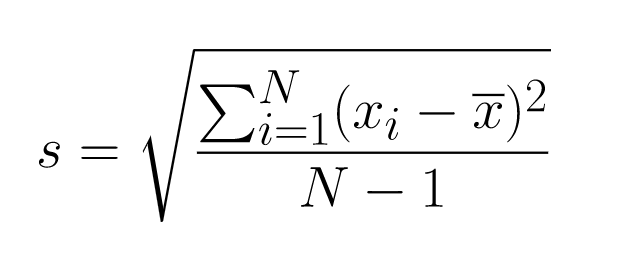

Compute sigma value form the computed centers

In [27]:
# K-means clustering of the input data used to determine optimum centers (these optimum centres will not be trainable parameters)
kmeans = KMeans(numHidden)
kmeans.fit(X)
centers = (kmeans.cluster_centers_) # 2 centre coordinate obtained for eachj hidden neuron (size -> numHidden x 2)
# Standard Devatiation -> use computed optimum centre locations
mean = np.mean(centers)
summ = np.sum((centers - mean)**2)
sigma = np.sqrt(summ/(len(centers)-1))
sigma

C:\Users\ashut\anaconda3\envs\ANNSM\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashut\anaconda3\envs\ANNSM\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.4335905525644212


## Define Weights and biases

Define the weights and Biases into the keys W and B respectively.

In [28]:
nn['W'] = np.random.randn(numHidden)
nn['B'] = np.random.randn(1)

# Array to store activated output of hidden layer
nn['A'] = np.zeros(numHidden)

learningRate = 0.01

In [29]:
y[1]

1.07

## Define function "Train" to perform FF and Back Propagation 

Radial basis functions are different from your normal neural nets as they have only 
3 layers. For a better understanding of the logic we go with the online approach. 
We loop through each of the inputs samples.

The net function is the the eucledian distance between inputs and centers.
We then activate the net function using gaussian function and multiply by weights.
Adding a bias is optional.

The backpropagation is the product of learning rate error and activated netfunction

The train function takes inputs, desired output (y), learning rate, num_epochs and the dictionary nn

In [30]:
def Train(x,y,lrate,epoc,network,strategy):
    for epoch in range(epoc):
        
        TotalError = []
        
        for i in range(x.shape[0]): # Looping through each sample
            
            #  Forward pass
            #  Looping through the centers (and hence hidden layers)
            for j in range(numHidden):
                if strategy == 'RBF':
                    network['A'][j] = radbasis(x[i,:],centers[j,:],sigma)
                elif strategy == 'MRBF':
                    network['A'][j] = modradbasis(x[i,:],centers[j,:],sigma)
                
                
            
            # Hidden to output layer computations
            o = float(np.matmul(network['W'].reshape((1,8)),network['A']) + nn['B'])
            
            # Back propagation
            error = 0.5*((y[i]-o)**2)
            error_der = y[i]-o
            
            # Deltas
            deltaW  =  lrate*error_der*nn['A']
            deltaB  = lrate*error_der
            
            # Update (Online Training -> Weights and Biases updated after every training sample)
            
            network['W'] = network['W'] + deltaW 
            network['B'] = network['B'] + deltaB
        
        # Print error every 500 epochs
        
        if epoch%500 == 0:
            print('Error at Epoch: ' + str(epoch) + ' is: ' + str(error))
    
    return network

## Define a function to predict the output 
We predict the trained values using a predict function. This seperate execution
is for better understanding and can also be executed together with the training.

In [31]:
def predict(x,y,centers,sigma,network,strategy):
    yPred = np.zeros(shape = y.shape)
    for i in range(x.shape[0]):
        for j in range(numHidden):
            if strategy == 'RBF':
                network['A'][j] = radbasis(x[i,:],centers[j,:],sigma)
            elif strategy == 'MRBF':
                network['A'][j] = modradbasis(x[i,:],centers[j,:],sigma)
            
        yPred[i] = float(np.matmul(network['W'].reshape((1,8)),network['A']) + network['B'])
        
    return yPred

## Training the Network

In [32]:
netChoice = 'MRBF' # MRBF or RBF
nn = Train(X,y,learningRate,5000,nn,netChoice)

C:\Users\ashut\AppData\Local\Temp\ipykernel_78676\4036251868.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  o = float(np.matmul(network['W'].reshape((1,8)),network['A']) + nn['B'])


Error at Epoch: 0 is: 0.1911127685659234
Error at Epoch: 500 is: 0.00027014518759347847
Error at Epoch: 1000 is: 0.00015459888635812677
Error at Epoch: 1500 is: 7.776557781297594e-05
Error at Epoch: 2000 is: 3.086953306020254e-05
Error at Epoch: 2500 is: 6.843958817282975e-06
Error at Epoch: 3000 is: 8.521390281547351e-10
Error at Epoch: 3500 is: 5.7858539640443695e-06
Error at Epoch: 4000 is: 2.0574494022968753e-05
Error at Epoch: 4500 is: 4.15030524535908e-05


## Get the Predicted Values

In [33]:
y_pred = predict(X,y,centers,sigma,nn,netChoice)

C:\Users\ashut\AppData\Local\Temp\ipykernel_78676\3377436239.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yPred[i] = float(np.matmul(network['W'].reshape((1,8)),network['A']) + network['B'])


## Plot Data

We plot the data between input and output and input and predicted output, for a good visual understanding.

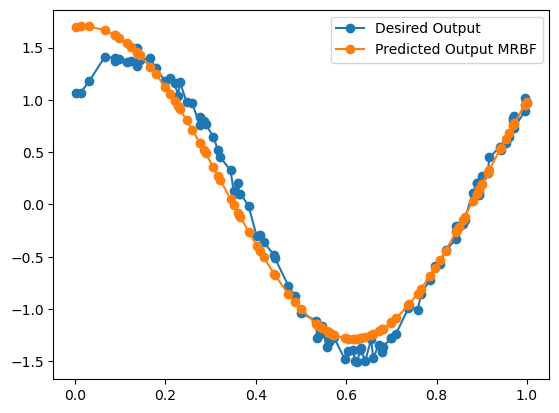

In [34]:
plt.plot(np.array(X[:,0]),y,'-o',label='Desired Output')
plt.plot(np.array(X[:,0]),y_pred,'-o',label='Predicted Output ' + netChoice)
plt.legend()
plt.show()

# Splitting the data into training and testing

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=24)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
# Reinitializing the network
nn = {}
nn['W'] = np.random.randn(numHidden)
nn['B'] = np.random.randn(1)

# Array to store activated output of hidden layer
nn['A'] = np.zeros(numHidden)
X_test.shape

(30, 2)

## Training the network using split training data

In [36]:
nn = Train(X_train,Y_train,learningRate,5000,nn,netChoice)

C:\Users\ashut\AppData\Local\Temp\ipykernel_78676\4036251868.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  o = float(np.matmul(network['W'].reshape((1,8)),network['A']) + nn['B'])


Error at Epoch: 0 is: 0.0005239634336441508
Error at Epoch: 500 is: 0.01709126553651238
Error at Epoch: 1000 is: 0.012379880308408423
Error at Epoch: 1500 is: 0.008751598537537398
Error at Epoch: 2000 is: 0.005996733725969684
Error at Epoch: 2500 is: 0.003942894408303207
Error at Epoch: 3000 is: 0.0024487815548957566
Error at Epoch: 3500 is: 0.0013988302436983182
Error at Epoch: 4000 is: 0.0006987521307233215
Error at Epoch: 4500 is: 0.0002718294275661239


## Predicting the output for the test data

In [37]:
y_pred = predict(X_test,Y_test,centers,sigma,nn,netChoice)

C:\Users\ashut\AppData\Local\Temp\ipykernel_78676\3377436239.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yPred[i] = float(np.matmul(network['W'].reshape((1,8)),network['A']) + network['B'])


## Plot Data

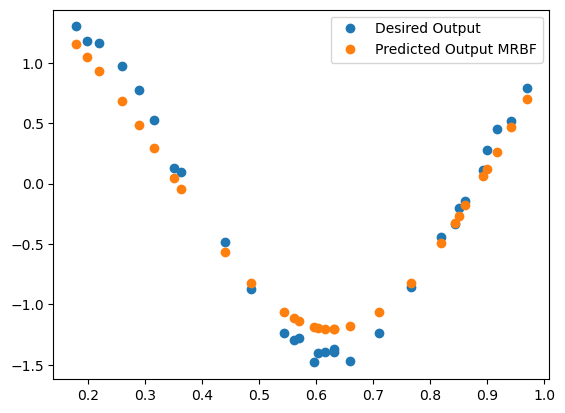

In [38]:
plt.plot(np.array(X_test[:,0]),Y_test,'o',label='Desired Output')
plt.plot(np.array(X_test[:,0]),y_pred,'o',label='Predicted Output ' + netChoice)
plt.legend()
plt.show()